In [3]:
import data_retrieval_utils as dru
import matplotlib.pyplot as plt
import pandas as pd
from run_dict import RUN_DICT, BASELINE_ALG, ML_ONLY_ALG, OCSVM_DEFAULT
import xarray as xr

In [6]:
run_names = {
    BASELINE_ALG: r"Baseline",
    ML_ONLY_ALG: r"ML-corrected $g_{\mathrm{Tq}}$",
    OCSVM_DEFAULT: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}$",
}
runs = {name: RUN_DICT[name] for name in run_names}

In [7]:
diags_complete = dru.get_diags_complete_downloaded(runs)

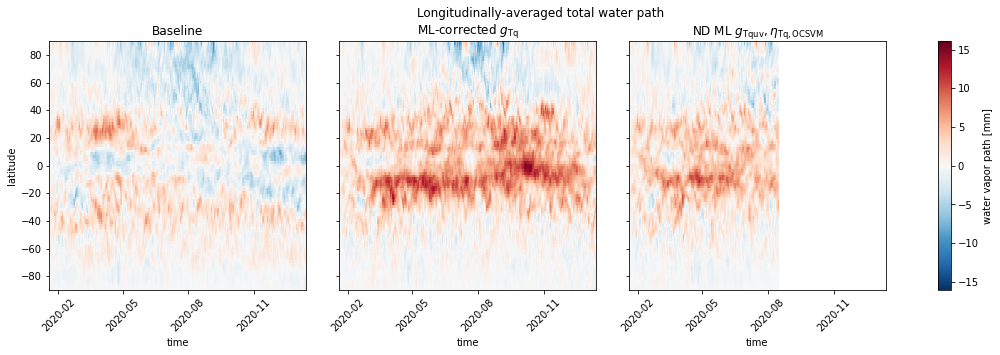

In [9]:
ds = xr.concat(
    [diags_complete[name].water_vapor_path_zonal_mean_bias for name in run_names],
    dim=pd.Index(run_names.values(), name="run"),
)
im = ds.plot(col = "run", x="time")
for i, title in enumerate(run_names.values()):
    im.axes[0][i].set_title(title)
    im.axes[0][i].tick_params(axis='x', labelrotation = 45)
im.fig.set_size_inches(16, 5)
im.fig.suptitle(r"Longitudinally-averaged total water path")
plt.show()

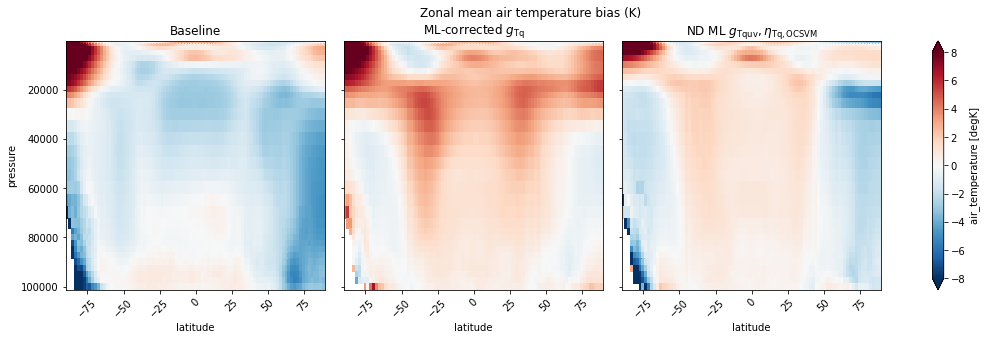

In [10]:
ds = xr.concat(
    [diags_complete[name].air_temperature_pressure_level_zonal_bias for name in run_names],
    dim=pd.Index(run_names.values(), name="run"),
)
im = ds.plot(col = "run", x="latitude", vmax=8, vmin=-8, cmap="RdBu_r")
for i, title in enumerate(run_names.values()):
    im.axes[0][i].set_title(title)
    im.axes[0][i].tick_params(axis='x', labelrotation = 45)
im.fig.set_size_inches(16, 5)
im.fig.suptitle(r"Zonal mean air temperature bias (K)")
plt.gca().invert_yaxis()
plt.show()